In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os


In [4]:
# Path to your dataset directory
dataset_dir = 'J:\Eduskills\Eduskill Internships\Skill4Future Garbage Classification intern\Garbage classification\Garbage classification'

# Image size
img_height, img_width = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Training set
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Class names
print("Classes:", train_generator.class_indices)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Classes: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\gh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 15

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)



c:\Users\gh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.2719 - loss: 1.7231 - val_accuracy: 0.3022 - val_loss: 1.5848
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.3792 - loss: 1.4417 - val_accuracy: 0.3559 - val_loss: 1.5096
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4598 - loss: 1.3201 - val_accuracy: 0.4155 - val_loss: 1.4511
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.4986 - loss: 1.2619 - val_accuracy: 0.4115 - val_loss: 1.4563
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4826 - loss: 1.2711 - val_accuracy: 0.4294 - val_loss: 1.4364
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.5568 - loss: 1.1540 - val_accuracy: 0.4851 - val_loss: 1.2723
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6043 - loss: 1.0329 - val_accuracy: 0.5030 - val_loss: 1.2655
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.5909 - loss: 1.0880 - val_accuracy: 0.5010 - val

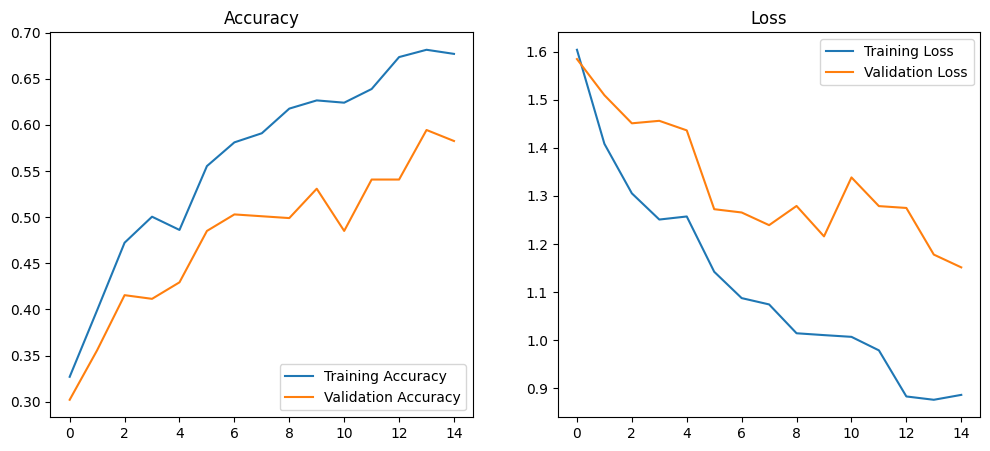

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to test image
img_path = 'J:\Eduskills\Eduskill Internships\Skill4Future Garbage Classification intern\Garbage classification\Garbage classification\cardboard\cardboard4.jpg'

img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_names = list(train_generator.class_indices.keys())
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Predicted class: cardboard


In [11]:

model.save("garbage_classifier_model.h5")
print("Model saved successfully.")


Model saved successfully.
